<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
zhvi_df = pd.read_csv('raw_data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
zhvi_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,102001,0,United States,Country,NaN,127215.0,127559.0,127921.0,128658.0,129402.0,...,282524.0,287231.0,292759.0,298643.0,304039.0,308663.0,312760.0,316645.0,320978.0,325677.0
1,394913,1,"New York, NY",Msa,NY,223454.0,224790.0,225991.0,228356.0,230557.0,...,528437.0,533927.0,541065.0,548965.0,556530.0,562411.0,566942.0,570483.0,573707.0,577647.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231141.0,231946.0,233179.0,235523.0,238036.0,...,767442.0,783105.0,802909.0,823806.0,837248.0,846358.0,851116.0,858319.0,867616.0,878396.0
3,394463,3,"Chicago, IL",Msa,IL,169006.0,169405.0,169921.0,170954.0,172049.0,...,263976.0,266711.0,270507.0,274647.0,278737.0,281790.0,284434.0,287113.0,289816.0,292436.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130305.0,130410.0,130496.0,130708.0,130930.0,...,290127.0,296537.0,303856.0,311657.0,319551.0,326735.0,332809.0,338271.0,344143.0,351550.0


In [3]:
id_vars = zhvi_df.columns[:5]
value_vars = zhvi_df.columns[5:]

zhvi_df = pd.melt(zhvi_df, id_vars=id_vars, value_vars=value_vars, var_name='Date', value_name='ZHVI')

In [4]:
zhvi_df['Date'] = pd.to_datetime(zhvi_df['Date'])

In [5]:
zhvi_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,ZHVI
0,102001,0,United States,Country,NaN,2000-01-31,127215.0
1,394913,1,"New York, NY",Msa,NY,2000-01-31,223454.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,2000-01-31,231141.0
3,394463,3,"Chicago, IL",Msa,IL,2000-01-31,169006.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,2000-01-31,130305.0


In [6]:
zhvi_df.describe()

,RegionID,SizeRank,ZHVI
count,240355.000000,240355.000000,1.915460e+05
mean,415038.457552,457.616318,1.621875e+05
std,84131.426636,267.562785,1.050533e+05
min,102001.000000,0.000000,2.854900e+04
25%,394547.000000,226.000000,9.971300e+04
50%,394803.000000,454.000000,1.327010e+05
75%,395050.000000,686.000000,1.886958e+05
max,753929.000000,933.000000,1.578375e+06


<AxesSubplot:>

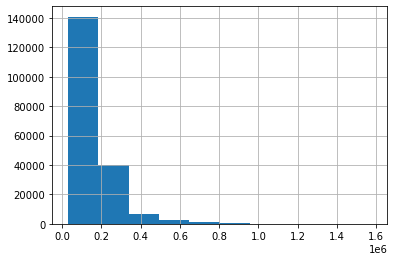

In [7]:
zhvi_df['ZHVI'].hist()

In [8]:
zhvi_df[['SizeRank', 'ZHVI']].corr(method='pearson')

,SizeRank,ZHVI
SizeRank,1.0000,-0.2708
ZHVI,-0.2708,1.0000


In [9]:
zhvi_df.groupby('RegionName').mean().sort_values('ZHVI', ascending=False).head(10)

,RegionID,SizeRank,ZHVI
RegionName,,,
"San Jose, CA",395059,34,845678.905660
"San Francisco, CA",395057,11,757556.969811
"Santa Cruz, CA",395065,171,670635.947170
"Vineyard Haven, MA",753925,923,669447.464151
"Key West, FL",394744,467,665885.459459
"Summit Park, UT",753922,751,642438.351648
"Jackson, WY",394713,808,586475.782895
"Kahului, HI",394731,260,580163.875472
"Edwards, CO",394556,577,565574.841509


In [10]:
zhvi_df.groupby('RegionName').mean().sort_values('ZHVI', ascending=False).tail(10)

,RegionID,SizeRank,ZHVI
RegionName,,,
"Altus, OK",394322,848,56480.344697
"Pine Bluff, AR",394980,376,55650.083019
"Logan, WV",753898,744,50602.231061
"Selma, AL",395083,653,49600.454545
"Camden, AR",394435,807,49358.316981
"Middlesborough, KY",394858,830,49244.173333
"Bastrop, LA",394364,838,48873.415094
"Forrest City, AR",394601,834,48515.347170
"Bennettsville, SC",394381,826,46739.541667


In [11]:
zhvi_df.groupby('RegionName').mean().sort_values('SizeRank', ascending=True).head(10)

,RegionID,SizeRank,ZHVI
RegionName,,,
United States,102001,0,195463.350943
"New York, NY",394913,1,408023.984906
"Los Angeles-Long Beach-Anaheim, CA",753899,2,508485.762264
"Chicago, IL",394463,3,222944.339623
"Dallas-Fort Worth, TX",394514,4,179148.354717
"Philadelphia, PA",394974,5,216572.064151
"Houston, TX",394692,6,168240.618868
"Washington, DC",395209,7,367460.992453
"Miami-Fort Lauderdale, FL",394856,8,236025.067925


In [12]:
zhvi_df.groupby('RegionName').mean().sort_values('SizeRank', ascending=True).tail(10)

,RegionID,SizeRank,ZHVI
RegionName,,,
"Winnemucca, NV",753927,924,233768.800000
"Sweetwater, TX",395142,925,65966.222222
"Andrews, TX",394330,926,129211.151316
"Zapata, TX",753929,927,79920.850340
"Vermillion, SD",395186,928,180965.732143
"Lamesa, TX",394767,929,62536.876923
"Craig, CO",753874,930,159633.087121
"Pecos, TX",394968,931,141482.000000
"Vernon, TX",395188,932,62229.773333


In [13]:
# NYC
nyc = zhvi_df.loc[zhvi_df['RegionID'] == 394913, ['Date', 'ZHVI']].reset_index(drop=True)

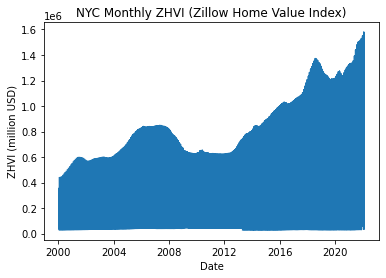

In [14]:
plt.plot('Date', 'ZHVI', data=zhvi_df)
plt.title('NYC Monthly ZHVI (Zillow Home Value Index)')
plt.ylabel('ZHVI (million USD)')
plt.xlabel('Date')
plt.show()

In [17]:
zhvi_df.groupby(['RegionName', 'Date'])['ZHVI'].mean().unstack(1).head()

Date,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
RegionName,,,,,,,,,,,,,,,,,,,,,
"Aberdeen, SD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,187490.0,189017.0,190520.0,191793.0,193083.0,194142.0,194906.0,195408.0,NaN,201435.0
"Aberdeen, WA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,256806.0,260758.0,266322.0,272957.0,284211.0,290220.0,297651.0,300984.0,309990.0,317227.0
"Abilene, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,149930.0,151972.0,154197.0,156962.0,159102.0,161454.0,163576.0,166156.0,168260.0,169999.0
"Ada, OK",54290.0,54478.0,54552.0,54733.0,54933.0,55252.0,55543.0,55760.0,55943.0,56090.0,...,113337.0,113834.0,114164.0,114374.0,115511.0,116805.0,117924.0,119013.0,NaN,124604.0
"Adrian, MI",114026.0,114454.0,114992.0,116189.0,117175.0,117940.0,118840.0,119604.0,120653.0,120949.0,...,179733.0,182248.0,185539.0,188711.0,192495.0,195990.0,199891.0,203751.0,207341.0,209570.0
